


# CNN - Convolutional Neural Network
<hr style="clear:both">

This jupyter notebook contains our journey to train a basic Convolutional Neural Network(CNN) for road segmentation in aerial images.



*Authors:* Mahmoud Dokmak, Romain Corbel, Guilhem

<hr style="clear:both">



In [6]:
from utils.cnn import SatelliteRoadCNN
from utils.SatDataset import SatDataset
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import numpy as np
from utils.helpers import *
from PIL import Image
from utils.mask_to_submission import *
import os

In [26]:
TRESHHOLD = 0.049

## Load Data and plot results

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
DATA_PATH = "dataset/TrainingInde/test"
MODEL_PATH = "models/cnn_augmented.pth"
acc_mean_aug, acc_std_aug, f1_mean_aug, f1_std_aug = metrics_mean_std(
    device, DATA_PATH, MODEL_PATH, TRESHHOLD
)

Loading model


In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"
DATA_PATH = "dataset/TrainingInde/test"
MODEL_PATH = "models/cnn.pth"
acc_mean, acc_std, f1_mean, f1_std = metrics_mean_std(
    device, DATA_PATH, MODEL_PATH, TRESHHOLD
)

Loading model


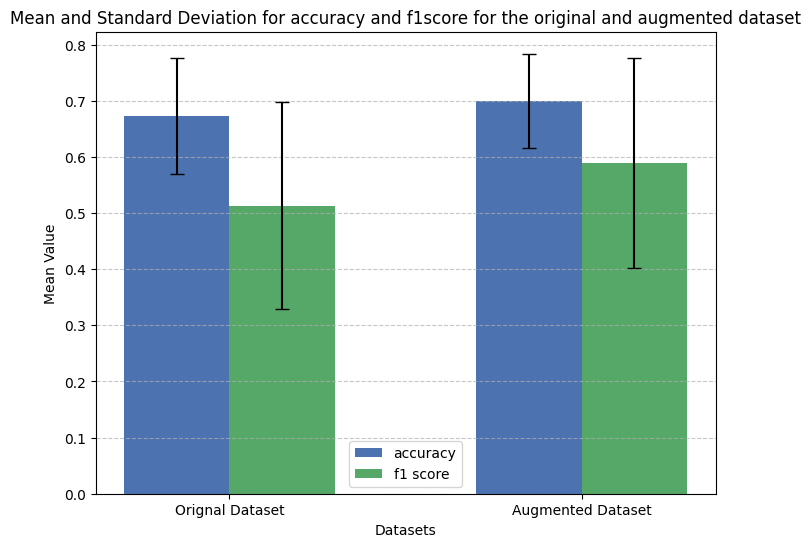

In [49]:
datasets = ["Orignal Dataset", "Augmented Dataset"]
metrics = ["accuracy", "f1 score"]

means = {"accuracy": [acc_mean, acc_mean_aug], "f1 score": [f1_mean, f1_mean_aug]}


stds = {"accuracy": [acc_std, acc_std_aug], "f1 score": [f1_std, f1_std_aug]}


x = np.arange(len(datasets))
width = 0.3
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(
    x - width / 2,
    means["accuracy"],
    yerr=stds["accuracy"],
    capsize=5,
    label="accuracy",
    color="#4C72B0",
    width=width,
)

bar2 = ax.bar(
    x + width / 2,
    means["f1 score"],
    yerr=stds["f1 score"],
    capsize=5,
    label="f1 score",
    color="#55A868",
    width=width,
)

ax.set_ylabel("Mean Value")
ax.set_xlabel("Datasets")
ax.set_title(
    "Mean and Standard Deviation for accuracy and f1score for the original and augmented dataset"
)
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Cnnplot.png")
plt.show()

## Let'see an example with a real image

In [50]:
MODEL_PATH = "models/cnn_augmented.pth"
img, mask, grt, f1 = find_best_image(device, DATA_PATH, MODEL_PATH, TRESHHOLD)

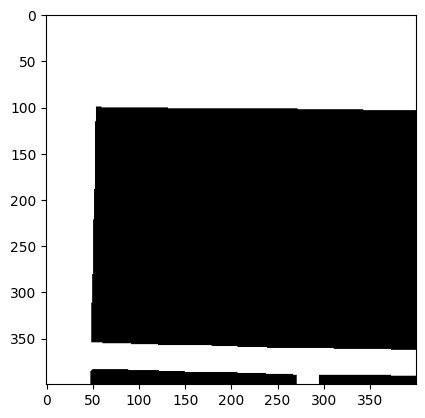

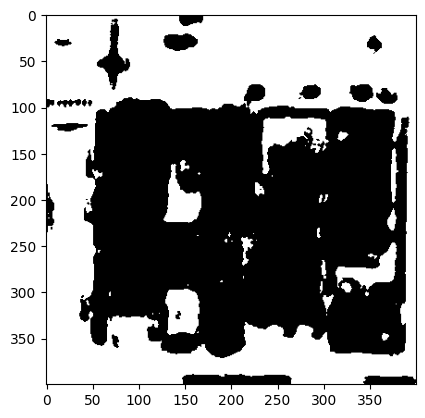

In [51]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.imshow(grt, cmap="gray")
plt.show()
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.imshow(mask, cmap="gray")
plt.show()

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
DATA_PATH = "dataset/test"
OUTPUT_PATH = "dataset/test/predicted"
MODEL_PATH = "models/cnn_augmented.pth"
model = SatelliteRoadCNN().to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device(device)))
dataset = SatDataset(DATA_PATH, training=False)
predictions = []
for id, img in enumerate(dataset):
    img = img.float().to(device)
    img = img.unsqueeze(0)
    mask = model(img)
    mask = mask.squeeze(0).squeeze(0).cpu().detach()
    pred_mask = torch.sigmoid(mask)
    pred_mask = (pred_mask >= TRESHHOLD).int().cpu()
    predictions.append(pred_mask)

    input_image_name = os.path.basename(dataset.images[id])
    output_name = f"predicted_{os.path.splitext(input_image_name)[0]}.png"
    save_mask(pred_mask, os.path.join(OUTPUT_PATH, output_name))

In [45]:
predicted = "dataset/test/predicted/"
submission_csv = "models/submission.csv"
names = [
    os.path.join(predicted, f) for f in os.listdir(predicted) if f.endswith(".png")
]

# Ensure that the images are sorted to respect the order
names.sort(key=lambda x: int(re.search(r"\d+", x).group()))
print("Collected image filenames:")
for name in names:
    print(name)

# Use the mask_to_submission function to create a csv file in the correct format
masks_to_submission(submission_csv, *names)
print(f"Submission file {submission_csv} created successfully.")

Collected image filenames:
dataset/test/predicted/predicted_test_1.png
dataset/test/predicted/predicted_test_2.png
dataset/test/predicted/predicted_test_3.png
dataset/test/predicted/predicted_test_4.png
dataset/test/predicted/predicted_test_5.png
dataset/test/predicted/predicted_test_6.png
dataset/test/predicted/predicted_test_7.png
dataset/test/predicted/predicted_test_8.png
dataset/test/predicted/predicted_test_9.png
dataset/test/predicted/predicted_test_10.png
dataset/test/predicted/predicted_test_11.png
dataset/test/predicted/predicted_test_12.png
dataset/test/predicted/predicted_test_13.png
dataset/test/predicted/predicted_test_14.png
dataset/test/predicted/predicted_test_15.png
dataset/test/predicted/predicted_test_16.png
dataset/test/predicted/predicted_test_17.png
dataset/test/predicted/predicted_test_18.png
dataset/test/predicted/predicted_test_19.png
dataset/test/predicted/predicted_test_20.png
dataset/test/predicted/predicted_test_21.png
dataset/test/predicted/predicted_test